In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import arviz as az
import pymc as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import cellbayesassay as cba
import os.path
import re
import warnings
import attila_utils

In [2]:
data = cba.get_data('../../resources/cell-based-assays/raw-data-cleaned-by-tina-CO28151-draft1.xlsx', 'Data')
data

,Study,Experiment,Assay,Batch,Plate,TI,Name,conc,concentration,conc_log10,Activity
0,CO28151,Aβ release (H4 cells),Aβ38,1,1,TI2,Phenamil methanesulfonate salt,c1,1.000000e-04,-4.0,4010.00000
1,CO28151,Aβ release (H4 cells),Aβ38,1,1,TI2,Phenamil methanesulfonate salt,c1,1.000000e-04,-4.0,6280.00000
2,CO28151,Aβ release (H4 cells),Aβ38,1,1,TI2,Phenamil methanesulfonate salt,c1,1.000000e-04,-4.0,27790.00000
3,CO28151,Aβ release (H4 cells),Aβ38,1,1,TI2,Phenamil methanesulfonate salt,c1,1.000000e-04,-4.0,32560.00000
4,CO28151,Aβ release (H4 cells),Aβ38,1,1,TI2,Phenamil methanesulfonate salt,c1,1.000000e-04,-4.0,20670.00000
...,...,...,...,...,...,...,...,...,...,...,...
1633,CO28151,Aβ clearance (BV2 cells),Aβ42 SN,2,2,VC,,NaN,1.000000e-09,-9.0,53839.31290
1634,CO28151,Aβ clearance (BV2 cells),Aβ42 SN,2,2,VC,,NaN,1.000000e-09,-9.0,58911.37592
1635,CO28151,Aβ clearance (BV2 cells),Aβ42 SN,2,2,VC,,NaN,1.000000e-09,-9.0,50964.09701
1636,CO28151,Aβ clearance (BV2 cells),Aβ42 SN,2,2,VC,,NaN,1.000000e-09,-9.0,NaN


In [3]:
study = 'CO28151'
exper = 'Aβ clearance (BV2 cells)'
assay = 'Aβ42 Ly'
TI = 'TI13'
data_reshaped = cba.extract_regr_data(study, exper, assay, TI, data, return_data_reshaped=True)
data_reshaped

,Study,Experiment,Assay,Batch,Plate,TI,Name,conc,concentration,conc_log10,Activity,std_activity
1170,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,VC,,VC,1.000000e-09,-9.00000,0.29,0.091680
1171,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,VC,,VC,1.000000e-09,-9.00000,0.33,0.104326
1172,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,VC,,VC,1.000000e-09,-9.00000,0.24,0.075873
1173,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,VC,,VC,1.000000e-09,-9.00000,0.09,0.028453
1174,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,VC,,VC,1.000000e-09,-9.00000,0.42,0.132778
1175,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,VC,,VC,1.000000e-09,-9.00000,0.69,0.218136
1194,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,TI13,Liraglutide,c1,1.000000e-05,-5.00000,0.05,0.015807
1195,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,TI13,Liraglutide,c1,1.000000e-05,-5.00000,0.70,0.221297
1196,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,TI13,Liraglutide,c1,1.000000e-05,-5.00000,0.75,0.237104
1197,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,TI13,Liraglutide,c1,1.000000e-05,-5.00000,0.35,0.110649


In [4]:
maindir = '../../results/2024-02-14-cell-bayes/'

if not os.path.exists(maindir + 'idatas/fpaths.csv'):
    idatadf = cba.fit_multiple_units(data, unit_list=None)
    idatas = idatadf.idata
    fpathdf = cba.idatas_to_netcdf(idatas, subdir='idatas/', maindir=maindir)
    print('idatas written to netcdf')
else:
    idatas = cba.idatas_from_netcdf(subdir='idatas/', maindir=maindir)
    print('idatas read from netcdf')

idatas = cba.sort_index_TI(idatas)
idatas

idatas read from netcdf


study    experiment                assay    TI  
CO28151  Aβ clearance (BV2 cells)  Aβ42 Ly  TI1     (posterior, log_likelihood, sample_stats, obse...
                                            TI2     (posterior, log_likelihood, sample_stats, obse...
                                            TI3     (posterior, log_likelihood, sample_stats, obse...
                                            TI4     (posterior, log_likelihood, sample_stats, obse...
                                            TI5     (posterior, log_likelihood, sample_stats, obse...
                                                                          ...                        
         Aβ release (H4 cells)     Aβ42     TI11    (posterior, log_likelihood, sample_stats, obse...
                                            TI12    (posterior, log_likelihood, sample_stats, obse...
                                            TI13    (posterior, log_likelihood, sample_stats, obse...
                                 

## Fitted curves: posterior sample 

In [5]:
plot_sampled_curves = False
fpath_suffix = '' if plot_sampled_curves else '-no-curves'

def assay_plotter(experiment, assay, plot_sampled_curves=plot_sampled_curves, compound_name_title=True):
    unit_list = idatas.loc(axis=0)[:, experiment, assay, :].index.to_numpy()
    fig, ax = cba.plot_multiple_units(unit_list, data, idatas, plot_sampled_curves=plot_sampled_curves, compound_name_title=compound_name_title)
    fig.suptitle(experiment + '\n' + assay)
    return((fig, ax))


/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:266: RuntimeWarning: overflow encountered in exp
  y_sigmoid_1_mean = y_1_mean + (y_0_mean - y_1_mean) / (1 + np.exp(k_mean * (xx - EC_50_mean)))


['named-figure/sampled-curves-Ab-clearance-BV2-SN-no-curves.png',
 'named-figure/sampled-curves-Ab-clearance-BV2-SN-no-curves.pdf']

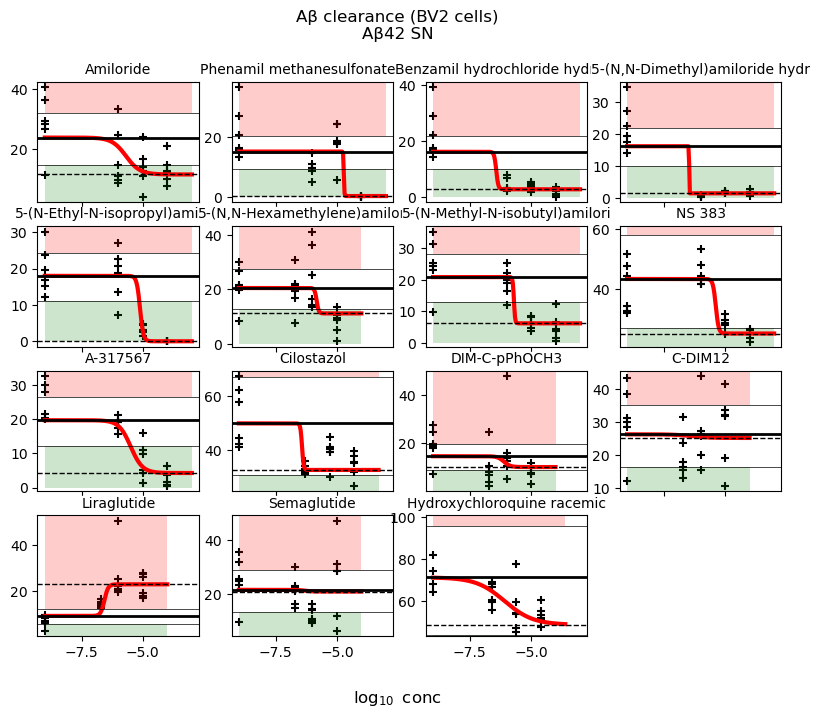

In [6]:
fig, ax = assay_plotter('Aβ clearance (BV2 cells)', 'Aβ42 SN')
attila_utils.savefig(fig, 'sampled-curves-Ab-clearance-BV2-SN' + fpath_suffix)

['named-figure/sampled-curves-Ab-clearance-BV2-Ly-no-curves.png',
 'named-figure/sampled-curves-Ab-clearance-BV2-Ly-no-curves.pdf']

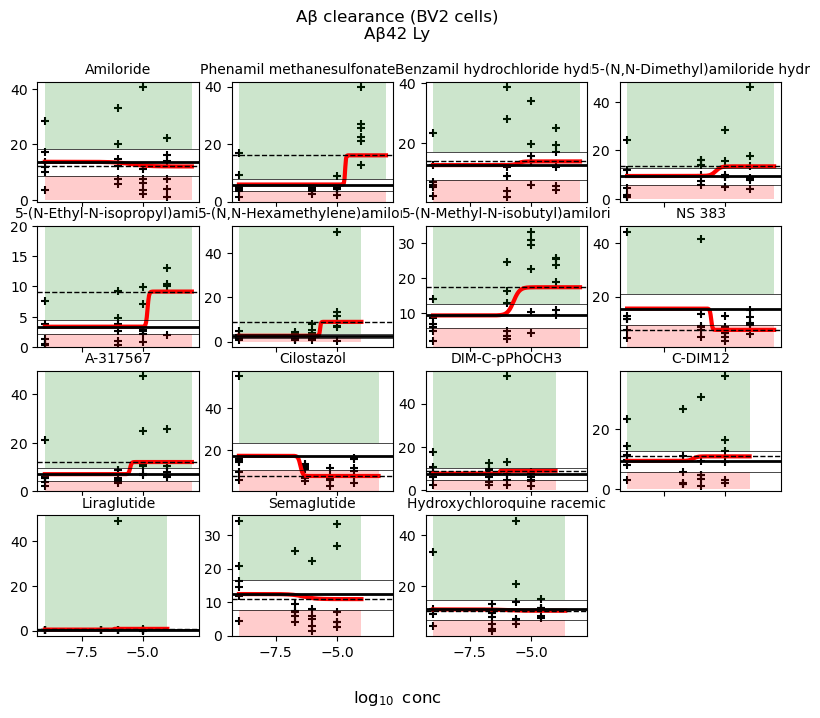

In [7]:
fig, ax = assay_plotter('Aβ clearance (BV2 cells)', 'Aβ42 Ly')
ax[1,0].set_ylim(0, 20)
attila_utils.savefig(fig, 'sampled-curves-Ab-clearance-BV2-Ly' + fpath_suffix)

['named-figure/sampled-curves-Ab-release-H4-Ab38-no-curves.png',
 'named-figure/sampled-curves-Ab-release-H4-Ab38-no-curves.pdf']

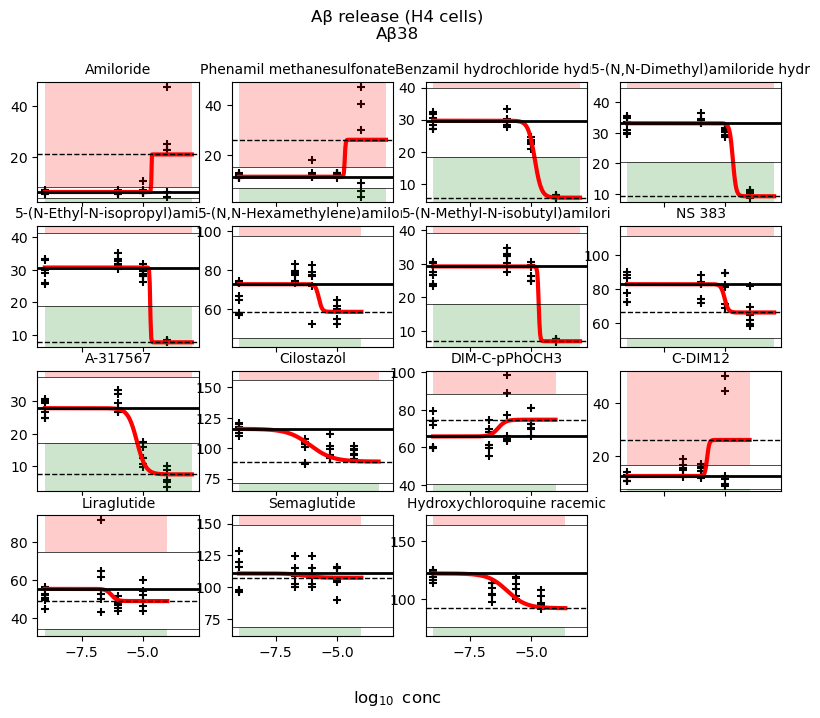

In [8]:
fig, ax = assay_plotter('Aβ release (H4 cells)', 'Aβ38')
attila_utils.savefig(fig, 'sampled-curves-Ab-release-H4-Ab38' + fpath_suffix)

/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:266: RuntimeWarning: overflow encountered in exp
  y_sigmoid_1_mean = y_1_mean + (y_0_mean - y_1_mean) / (1 + np.exp(k_mean * (xx - EC_50_mean)))
/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:266: RuntimeWarning: overflow encountered in exp
  y_sigmoid_1_mean = y_1_mean + (y_0_mean - y_1_mean) / (1 + np.exp(k_mean * (xx - EC_50_mean)))


['named-figure/sampled-curves-Ab-release-H4-Ab40-no-curves.png',
 'named-figure/sampled-curves-Ab-release-H4-Ab40-no-curves.pdf']

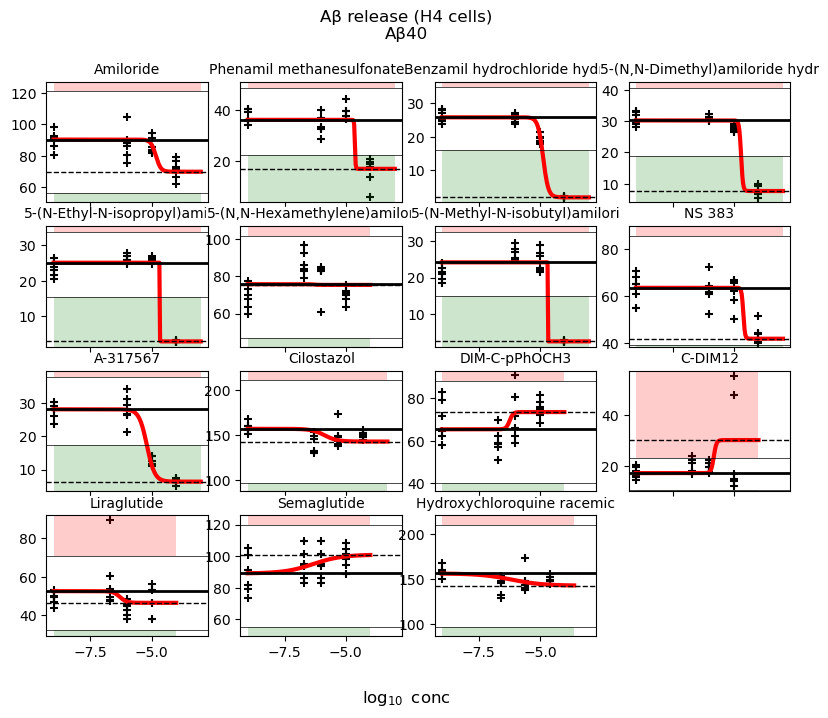

In [9]:
fig, ax = assay_plotter('Aβ release (H4 cells)', 'Aβ40')
attila_utils.savefig(fig, 'sampled-curves-Ab-release-H4-Ab40' + fpath_suffix)

['named-figure/sampled-curves-Ab-release-H4-Ab42-no-curves.png',
 'named-figure/sampled-curves-Ab-release-H4-Ab42-no-curves.pdf']

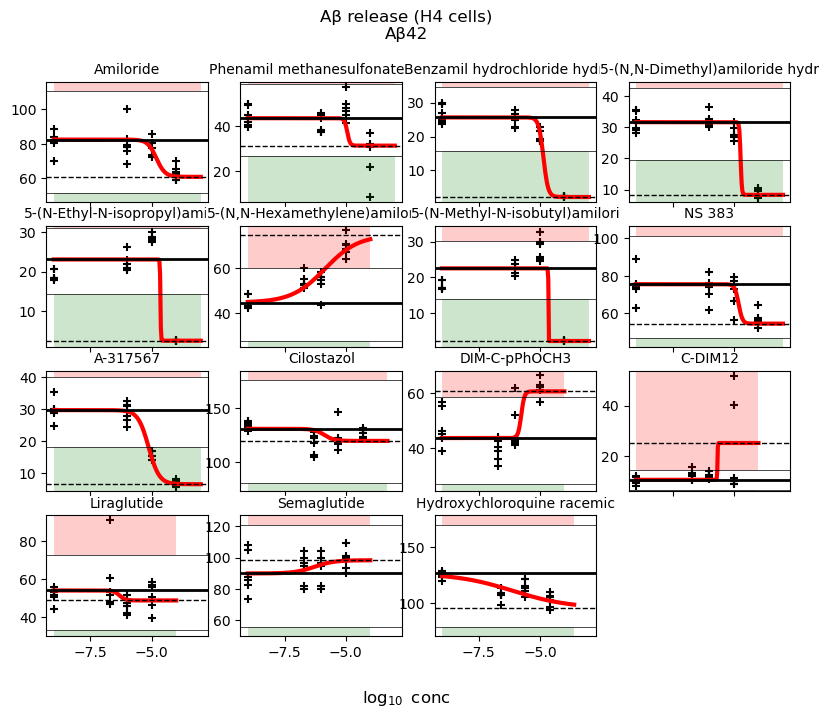

In [10]:
fig, ax = assay_plotter('Aβ release (H4 cells)', 'Aβ42')
attila_utils.savefig(fig, 'sampled-curves-Ab-release-H4-Ab42' + fpath_suffix)

## Fit diagnostics

In [11]:
poor_fits = [
    ('CO28151', 'Aβ clearance (BV2 cells)', 'Aβ42 Ly', 'TI13'),
    ('CO28151', 'Aβ release (H4 cells)', 'Aβ38', 'TI4'),
]

In [12]:
cba.get_diagnostics_series(idatas, az.ess)

In [13]:
cba.get_diagnostics_series(idatas, az.rhat, vmax=1.1)

In [14]:
cba.get_diagnostics_series(idatas, az.mcse, vmax=10)

In [15]:
df = cba.get_diagnostics_series(idatas, az.mcse, return_df=True).drop('k', level='parameter', axis=0)
df.style.format(precision=3).background_gradient(axis=None, vmin=df.min().min(), vmax=df.max().max(), cmap='hot')

['named-figure/ess.png', 'named-figure/ess.pdf']

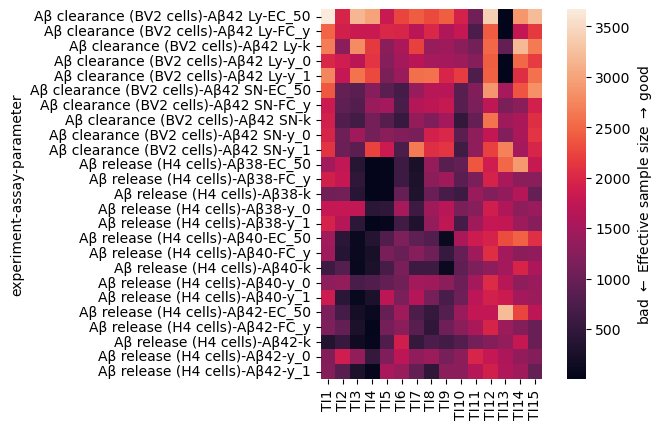

In [16]:
g = cba.diagnostics_series_heatmap(idatas, az.ess, yticklabels=True)
attila_utils.savefig(g.figure, 'ess')

['named-figure/ess-noyticklabels.png', 'named-figure/ess-noyticklabels.pdf']

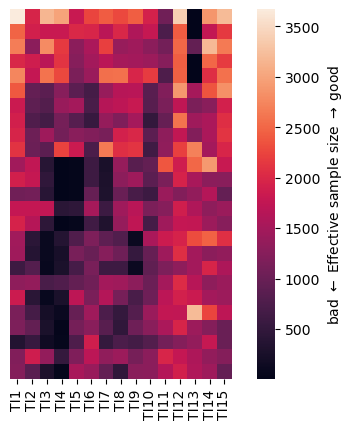

In [17]:
g = cba.diagnostics_series_heatmap(idatas, az.ess, yticklabels=False)
attila_utils.savefig(g.figure, 'ess-noyticklabels')

['named-figure/rhat.png', 'named-figure/rhat.pdf']

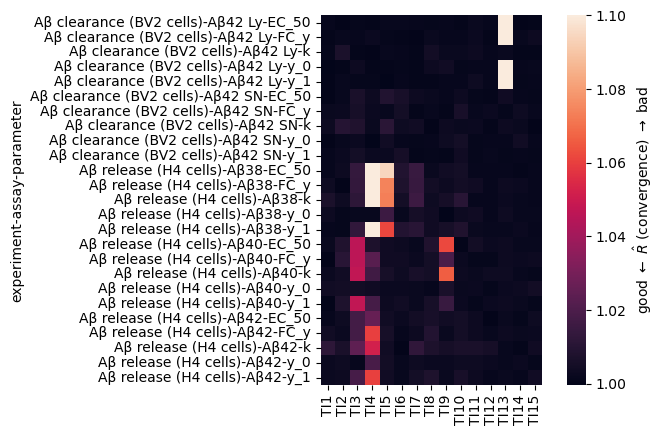

In [18]:
g = cba.diagnostics_series_heatmap(idatas, az.rhat, yticklabels=True, vmax=1.1)
attila_utils.savefig(g.figure, 'rhat')

['named-figure/rhat-noyticklabels.png', 'named-figure/rhat-noyticklabels.pdf']

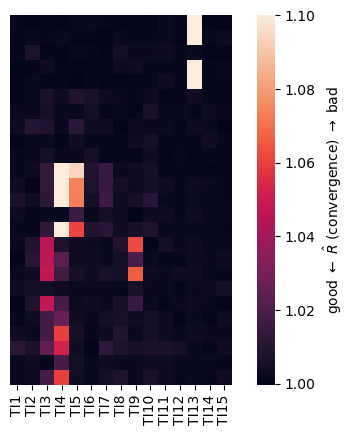

In [19]:
g = cba.diagnostics_series_heatmap(idatas, az.rhat, yticklabels=False, vmax=1.1)
attila_utils.savefig(g.figure, 'rhat-noyticklabels')

['named-figure/mcse.png', 'named-figure/mcse.pdf']

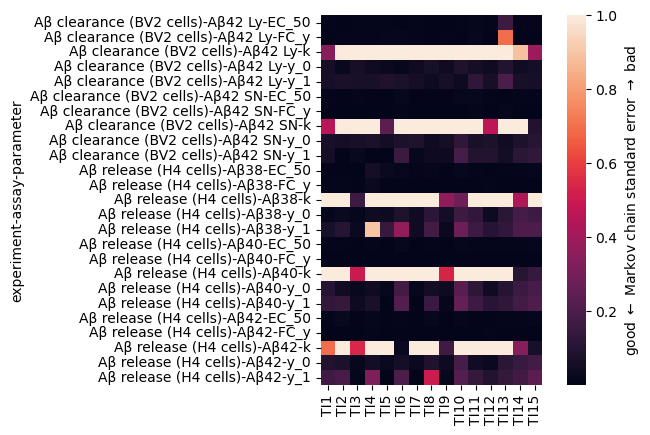

In [20]:
g = cba.diagnostics_series_heatmap(idatas, az.mcse, yticklabels=True, vmax=1)
attila_utils.savefig(g.figure, 'mcse')

['named-figure/mcse-noyticklabels.png', 'named-figure/mcse-noyticklabels.pdf']

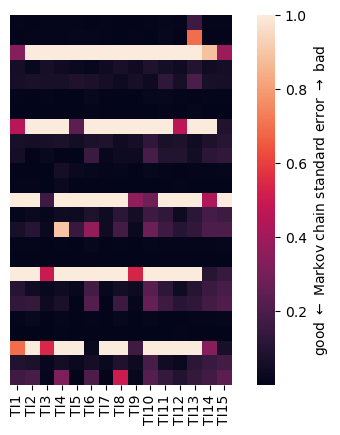

In [21]:
g = cba.diagnostics_series_heatmap(idatas, az.mcse, yticklabels=False, vmax=1)
attila_utils.savefig(g.figure, 'mcse-noyticklabels')

In [22]:
fpath = '../../results/2024-02-14-cell-bayes/H102_posteriors.csv'
if not os.path.exists(fpath):
    H102_posteriors = cba.get_H102_posterior_from_idatas(idatas, poor_fits)
    H102_posteriors = cba.sort_index_TI(H102_posteriors)
    H102_posteriors['name'] = cba.get_TI_name().xs('CO28151', level=0, axis=0).loc[H102_posteriors.index.get_level_values('TI'), 'Name'].to_list()
    H102_posteriors.to_csv(fpath)
else:
    H102_posteriors = pd.read_csv(fpath, index_col=[0, 1, 2, 3])
    
H102_posteriors

H1       H0       H2  \
study   experiment               assay   TI                                
CO28151 Aβ clearance (BV2 cells) Aβ42 Ly TI1   0.07300  0.77600  0.15100   
                                         TI2   0.99925  0.00075  0.00000   
                                         TI3   0.25525  0.69925  0.04550   
                                         TI4   0.61225  0.38000  0.00775   
                                         TI5   0.99875  0.00125  0.00000   
...                                                ...      ...      ...   
        Aβ release (H4 cells)    Aβ42    TI11  0.00000  0.37325  0.62675   
                                         TI12  0.00000  0.00200  0.99800   
                                         TI13  0.02650  0.95625  0.01725   
                                         TI14  0.00025  0.95300  0.04675   
                                         TI15  0.06325  0.93675  0.00000   

                                                                                  name  
study   experiment               assay   TI                                             
CO28151 Aβ clearance (BV2 cells) Aβ42 Ly TI1                                 Amiloride  
                                         TI2            Phenamil methanesulfonate salt  
                                         TI3            Benzamil hydrochloride hydrate  
                                         TI4   5-(N,N-Dimethyl)amiloride hydrochloride  
                                         TI5          5-(N-Ethyl-N-isopropyl)amiloride  
...                                                                                ...  
        Aβ release (H4 cells)    Aβ42    TI11                            DIM-C-pPhOCH3  
                                         TI12                                  C-DIM12  
                                         TI13                              Liraglutide  
                                         TI14                              Semaglutide  
                                         TI15               Hydroxychloroquine racemic  

[75 rows x 4 columns]

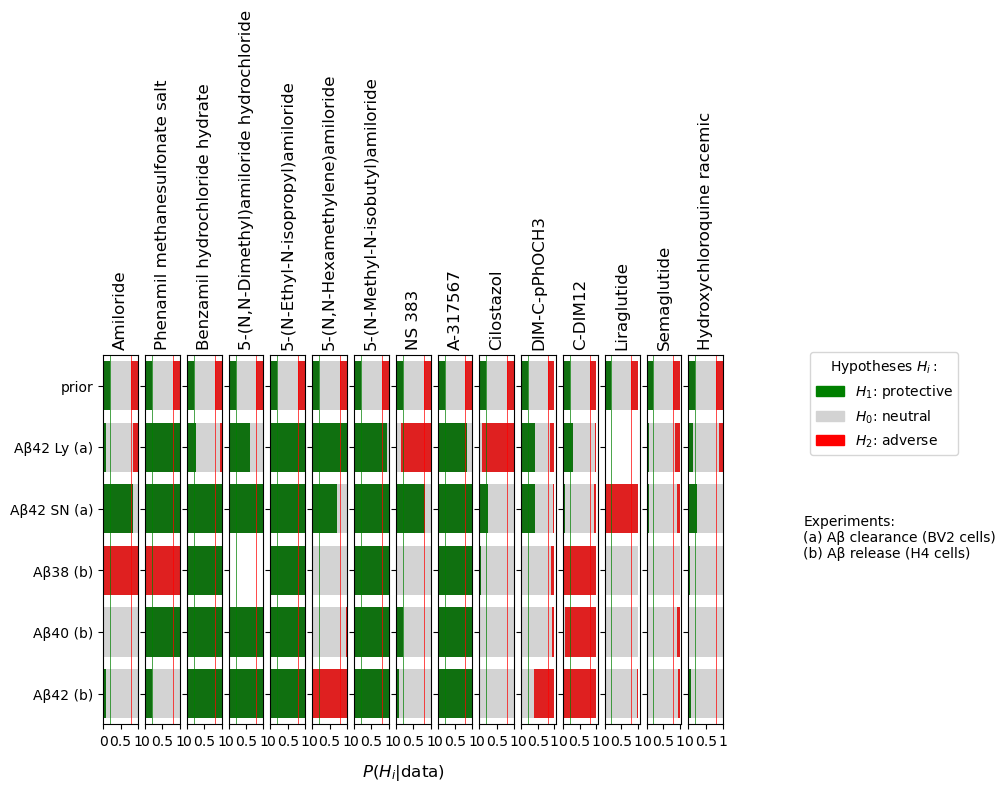

In [23]:
def reshape_H102_posteriors(H102_posteriors, show_names=True):
    if show_names:
        val = H102_posteriors.copy().set_index('name', append=True).droplevel('TI')
    else:
        val = H102_posteriors.copy().drop('name', axis=1)
    val = val.xs('CO28151', level=0, axis=0).unstack(level=2, sort=False).swaplevel(axis=1)
    return(val)

def my_barchart(H102_posteriors, show_names=True, e2l_textbox=True, legend=True):
    fig, ax = cba.barchart_H102_posteriors(reshape_H102_posteriors(H102_posteriors, show_names=show_names), e2l_textbox=e2l_textbox, legend=legend)
    fig.set_size_inches(8, 4.8)
    fig.supylabel('')
    if show_names:
        for axi in ax:
            axi.set_title(axi.get_title(), rotation=90)
    return((fig, ax))

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    fig, ax = my_barchart(H102_posteriors, show_names=True)
    attila_utils.savefig(fig, 'barchart-H102')

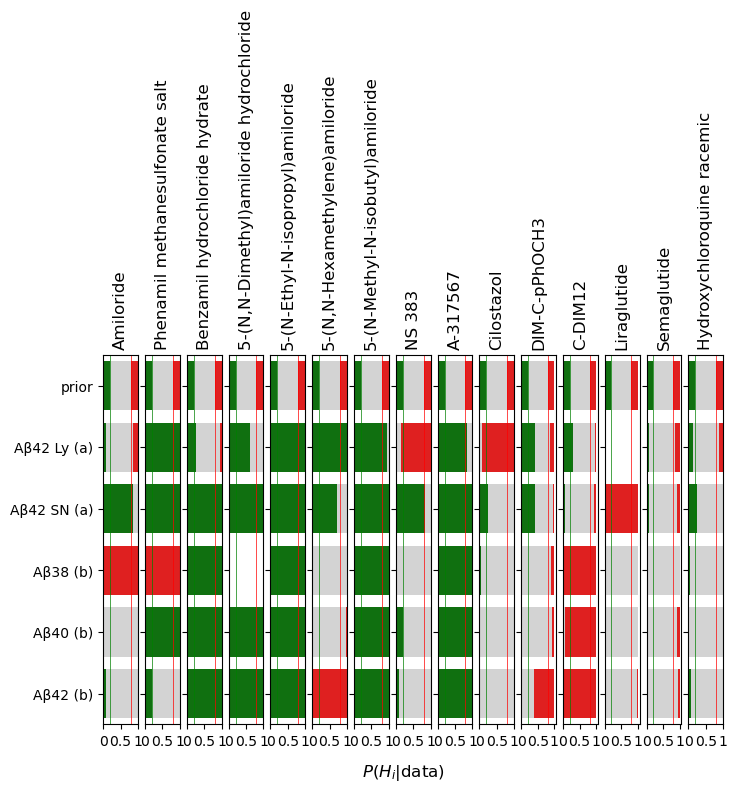

In [24]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    fig, ax = my_barchart(H102_posteriors, show_names=True, e2l_textbox=False, legend=False)
    attila_utils.savefig(fig, 'barchart-H102-nolegend')

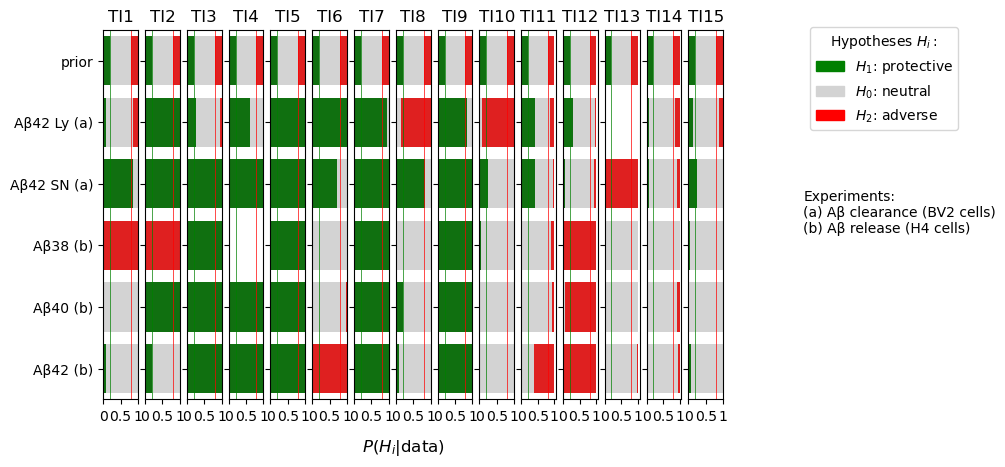

In [25]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    fig, ax = my_barchart(H102_posteriors, show_names=False)
    attila_utils.savefig(fig, 'barchart-H102-TI')

## Comparison with QPS' local frequentist analysis

In [34]:
plot_sampled_curves = True

def TI_plotter(TI, experiment, study='CO28151', plot_sampled_curves=plot_sampled_curves, H102_posteriors=H102_posteriors):
    unit_list = idatas.loc(axis=0)[:, experiment, :, TI].index.to_numpy()
    ncols = len(unit_list)
    fig, ax = cba.plot_multiple_units(unit_list, data, idatas, plot_sampled_curves=plot_sampled_curves, ncols=ncols, nrows=1, figsize=(9.6, 2.4))
    for axi, assay in zip(ax, [x[2] for x in unit_list]):
        axi.set_title(assay)
        handles = [mpatches.Rectangle((0, 0), 8, 4, color=c, ec='black', linewidth=0.5, alpha=0.5) for c in ['green', 'white', 'red']]
        P_H102 = H102_posteriors.loc[study, experiment, assay, TI].drop('name').to_list()
        labels = [r'$P(H_{} \, | \, D) = {:1.2f}$'.format(i, p) for i, p in zip([1, 0, 2], P_H102)]
        axi.legend(handles, labels)
    fig.supxlabel('')
    compound = cba.get_TI_name().loc[(study, TI), 'Name']
    fig.suptitle(compound, va='bottom')
    return((fig, ax))

### Bayesian regression eliminates false negatives

/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:260: RuntimeWarning: overflow encountered in exp
  yy = y_1 + (y_0 - y_1) / (1 + np.exp(k * (xx - EC_50)))
/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:260: RuntimeWarning: overflow encountered in exp
  yy = y_1 + (y_0 - y_1) / (1 + np.exp(k * (xx - EC_50)))


['named-figure/sampled-curves-Ab-clearance-BV2-TI6.png',
 'named-figure/sampled-curves-Ab-clearance-BV2-TI6.pdf']

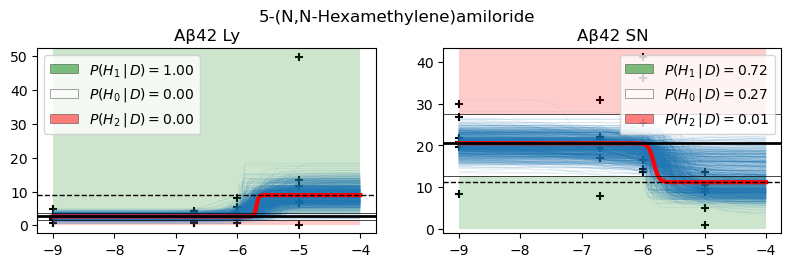

In [35]:
TI = 'TI6'
fig, ax = TI_plotter(TI, 'Aβ clearance (BV2 cells)')
attila_utils.savefig(fig, 'sampled-curves-Ab-clearance-BV2-' + TI) 

/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:260: RuntimeWarning: overflow encountered in exp
  yy = y_1 + (y_0 - y_1) / (1 + np.exp(k * (xx - EC_50)))
/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:260: RuntimeWarning: overflow encountered in exp
  yy = y_1 + (y_0 - y_1) / (1 + np.exp(k * (xx - EC_50)))
/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:266: RuntimeWarning: overflow encountered in exp
  y_sigmoid_1_mean = y_1_mean + (y_0_mean - y_1_mean) / (1 + np.exp(k_mean * (xx - EC_50_mean)))


['named-figure/sampled-curves-Ab-clearance-BV2-TI4.png',
 'named-figure/sampled-curves-Ab-clearance-BV2-TI4.pdf']

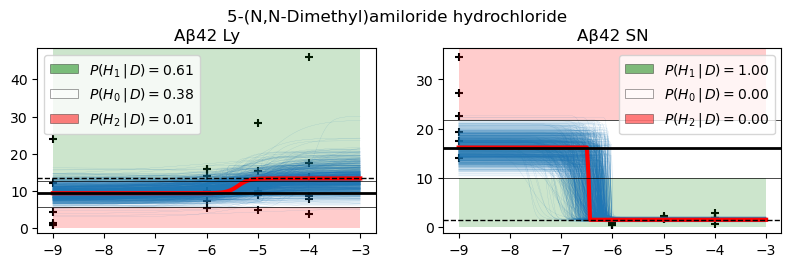

In [36]:
TI = 'TI4'
fig, ax = TI_plotter(TI, 'Aβ clearance (BV2 cells)')
attila_utils.savefig(fig, 'sampled-curves-Ab-clearance-BV2-' + TI) 

/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:260: RuntimeWarning: overflow encountered in exp
  yy = y_1 + (y_0 - y_1) / (1 + np.exp(k * (xx - EC_50)))
/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:260: RuntimeWarning: overflow encountered in exp
  yy = y_1 + (y_0 - y_1) / (1 + np.exp(k * (xx - EC_50)))
/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:260: RuntimeWarning: overflow encountered in exp
  yy = y_1 + (y_0 - y_1) / (1 + np.exp(k * (xx - EC_50)))


['named-figure/sampled-curves-Ab-release-H4-TI12.png',
 'named-figure/sampled-curves-Ab-release-H4-TI12.pdf']

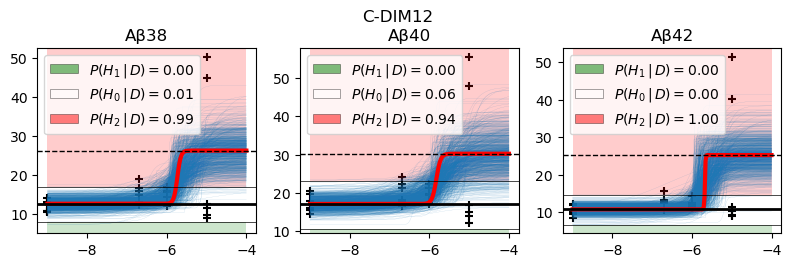

In [37]:
TI = 'TI12'
fig, ax = TI_plotter(TI, 'Aβ release (H4 cells)')
attila_utils.savefig(fig, 'sampled-curves-Ab-release-H4-' + TI) 

/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:260: RuntimeWarning: overflow encountered in exp
  yy = y_1 + (y_0 - y_1) / (1 + np.exp(k * (xx - EC_50)))
/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:260: RuntimeWarning: overflow encountered in exp
  yy = y_1 + (y_0 - y_1) / (1 + np.exp(k * (xx - EC_50)))


['named-figure/sampled-curves-Ab-clearance-BV2-TI7.png',
 'named-figure/sampled-curves-Ab-clearance-BV2-TI7.pdf']

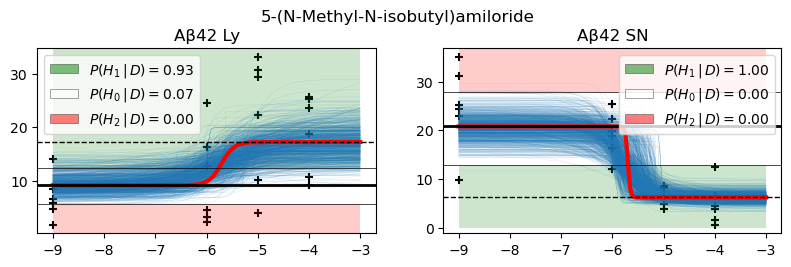

In [38]:
TI = 'TI7'
fig, ax = TI_plotter(TI, 'Aβ clearance (BV2 cells)')
attila_utils.savefig(fig, 'sampled-curves-Ab-clearance-BV2-' + TI) 

### Bayesian regression eliminates false positives

/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:260: RuntimeWarning: overflow encountered in exp
  yy = y_1 + (y_0 - y_1) / (1 + np.exp(k * (xx - EC_50)))
/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:260: RuntimeWarning: overflow encountered in exp
  yy = y_1 + (y_0 - y_1) / (1 + np.exp(k * (xx - EC_50)))
/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:260: RuntimeWarning: overflow encountered in exp
  yy = y_1 + (y_0 - y_1) / (1 + np.exp(k * (xx - EC_50)))


['named-figure/sampled-curves-Ab-release-H4-TI12.png',
 'named-figure/sampled-curves-Ab-release-H4-TI12.pdf']

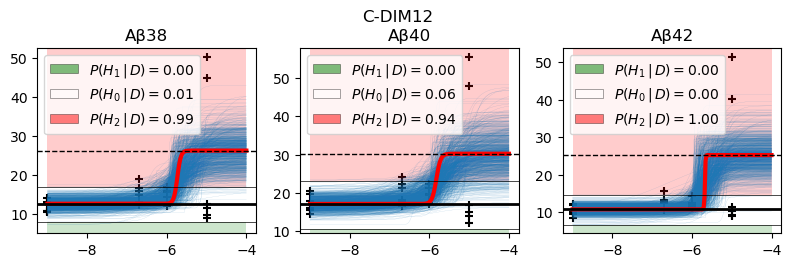

In [39]:
TI = 'TI12'
fig, ax = TI_plotter(TI, 'Aβ release (H4 cells)')
attila_utils.savefig(fig, 'sampled-curves-Ab-release-H4-' + TI) 

In [ ]:
TI = 'TI15'
fig, ax = TI_plotter(TI, 'Aβ release (H4 cells)')
attila_utils.savefig(fig, 'sampled-curves-Ab-release-H4-' + TI) 

/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:260: RuntimeWarning: overflow encountered in exp
  yy = y_1 + (y_0 - y_1) / (1 + np.exp(k * (xx - EC_50)))


In [ ]:
%connect_info